
используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.
Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). 
Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте  предварительно применить к признакам standard scaling.



In [1]:
import numpy as np
import random

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = load_breast_cancer()
y = data.target

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(data.data)

In [4]:
X_scaled = scaler.transform(X)

alpha = np.logspace(-2,2,5)

In [5]:
rademacher = []
for al in alpha:
    rad_vals = []
    for exp in range(100):
        n = y.shape[0]
        sigma = np.array([random.choice([-1, 1]) for el in range(n)])
        lr = LogisticRegression(penalty='l2', C=al).fit(X_scaled, sigma)
        pred = np.array([lr.decision_function(X_scaled[i:i+1,:]) for i in range(n)])
        margins = sigma.reshape(sigma.shape[0], 1) * pred
        marg = np.mean(margins)
        rad_val = abs(np.mean(marg))
        rad_vals.append(rad_val)
    rademacher.append(rad_vals)

In [6]:
rad_mean = []
rad_std = []

for i in range(len(alpha)):
    cur_vals = rademacher[i]
    rad_mean.append(np.mean(cur_vals))
    rad_std.append(np.std(cur_vals))

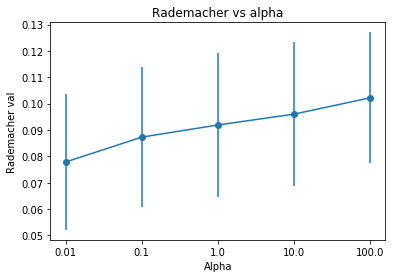

In [7]:
plt.errorbar(np.arange(len(alpha)), rad_mean, yerr=rad_std, fmt='-o')
plt.xticks(np.arange(len(alpha)), alpha)
plt.title('Rademacher vs alpha')
plt.xlabel('Alpha')
plt.ylabel('Rademacher val')
plt.show()